In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import keras

from keras.layers import Dense, Activation, Input
from keras.models import Model

Using TensorFlow backend.


In [10]:
ds = pd.read_csv('Datasets/train.csv')
data = ds.values[:5000, 1:]/255.0
print data.shape


(5000, 784)


In [4]:
# Define the layers
inp = Input(shape=(784,))
h1 = Dense(100)
a1 = Activation('sigmoid')
h2 = Dense(2)
a2 = Activation('sigmoid')
h3 = Dense(100)
a3 = Activation('sigmoid')
y = Dense(784,)
ya = Activation('sigmoid')

# connect layers for autoencoder
out = ya(y(a3(h3(a2(h2(a1(h1(inp))))))))

# Create autoencoder model
model = Model(inputs=[inp], outputs=[out])
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Build encoder model
encoder = Model(inputs=[inp], outputs=[a3(h3(a2(h2(a1(h1(inp))))))])
encoder.summary()

# Build decoder model
dec_inp = Input(shape=(100,))
dec_out = ya(y(dec_inp))
decoder = Model(inputs=[dec_inp], outputs=[dec_out])
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
__________

In [5]:
hist = model.fit(data[:4500], data[:4500],
                epochs=50,
                shuffle=True,
                batch_size=100,
                validation_data=(data[4500:], data[4500:]))

Train on 4500 samples, validate on 500 samples
Epoch 1/50
4500/4500 [==============================] - 3s - loss: 0.1272 - acc: 0.0127 - val_loss: 0.0777 - val_acc: 0.0020
Epoch 2/50
4500/4500 [==============================] - 0s - loss: 0.0732 - acc: 0.0082 - val_loss: 0.0694 - val_acc: 0.0160
Epoch 3/50
4500/4500 [==============================] - 0s - loss: 0.0696 - acc: 0.0116 - val_loss: 0.0680 - val_acc: 0.0100
Epoch 4/50
4500/4500 [==============================] - 0s - loss: 0.0688 - acc: 0.0076 - val_loss: 0.0675 - val_acc: 0.0020
Epoch 5/50
4500/4500 [==============================] - 0s - loss: 0.0684 - acc: 0.0080 - val_loss: 0.0672 - val_acc: 0.0140
Epoch 6/50
4500/4500 [==============================] - 0s - loss: 0.0682 - acc: 0.0096 - val_loss: 0.0672 - val_acc: 0.0100
Epoch 7/50
4500/4500 [==============================] - 0s - loss: 0.0681 - acc: 0.0104 - val_loss: 0.0670 - val_acc: 0.0020
Epoch 8/50
4500/4500 [==============================] - 0s - loss: 0.0680 - ac

In [6]:
ex = encoder.predict(data[:100])
print ex.shape

(100, 100)


In [7]:
dx = decoder.predict(ex)
print dx.shape

(100, 784)


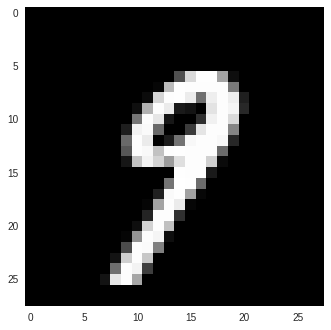

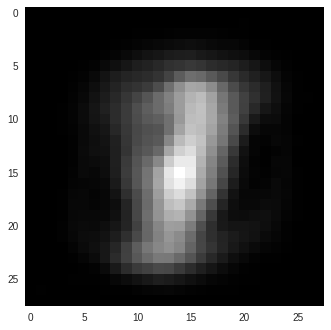

In [17]:
n=np.random.choice(range(100))
plt.figure(0)
plt.grid('off')
plt.imshow(data[n].reshape((28, 28)), cmap='gray')

plt.figure(1)
plt.grid('off')
plt.imshow(dx[n].reshape((28, 28)), cmap='gray')

In [ ]:
print n
